### 6.1 Evauation Feature Importance

In [12]:
import pandas as pd
import numpy as np


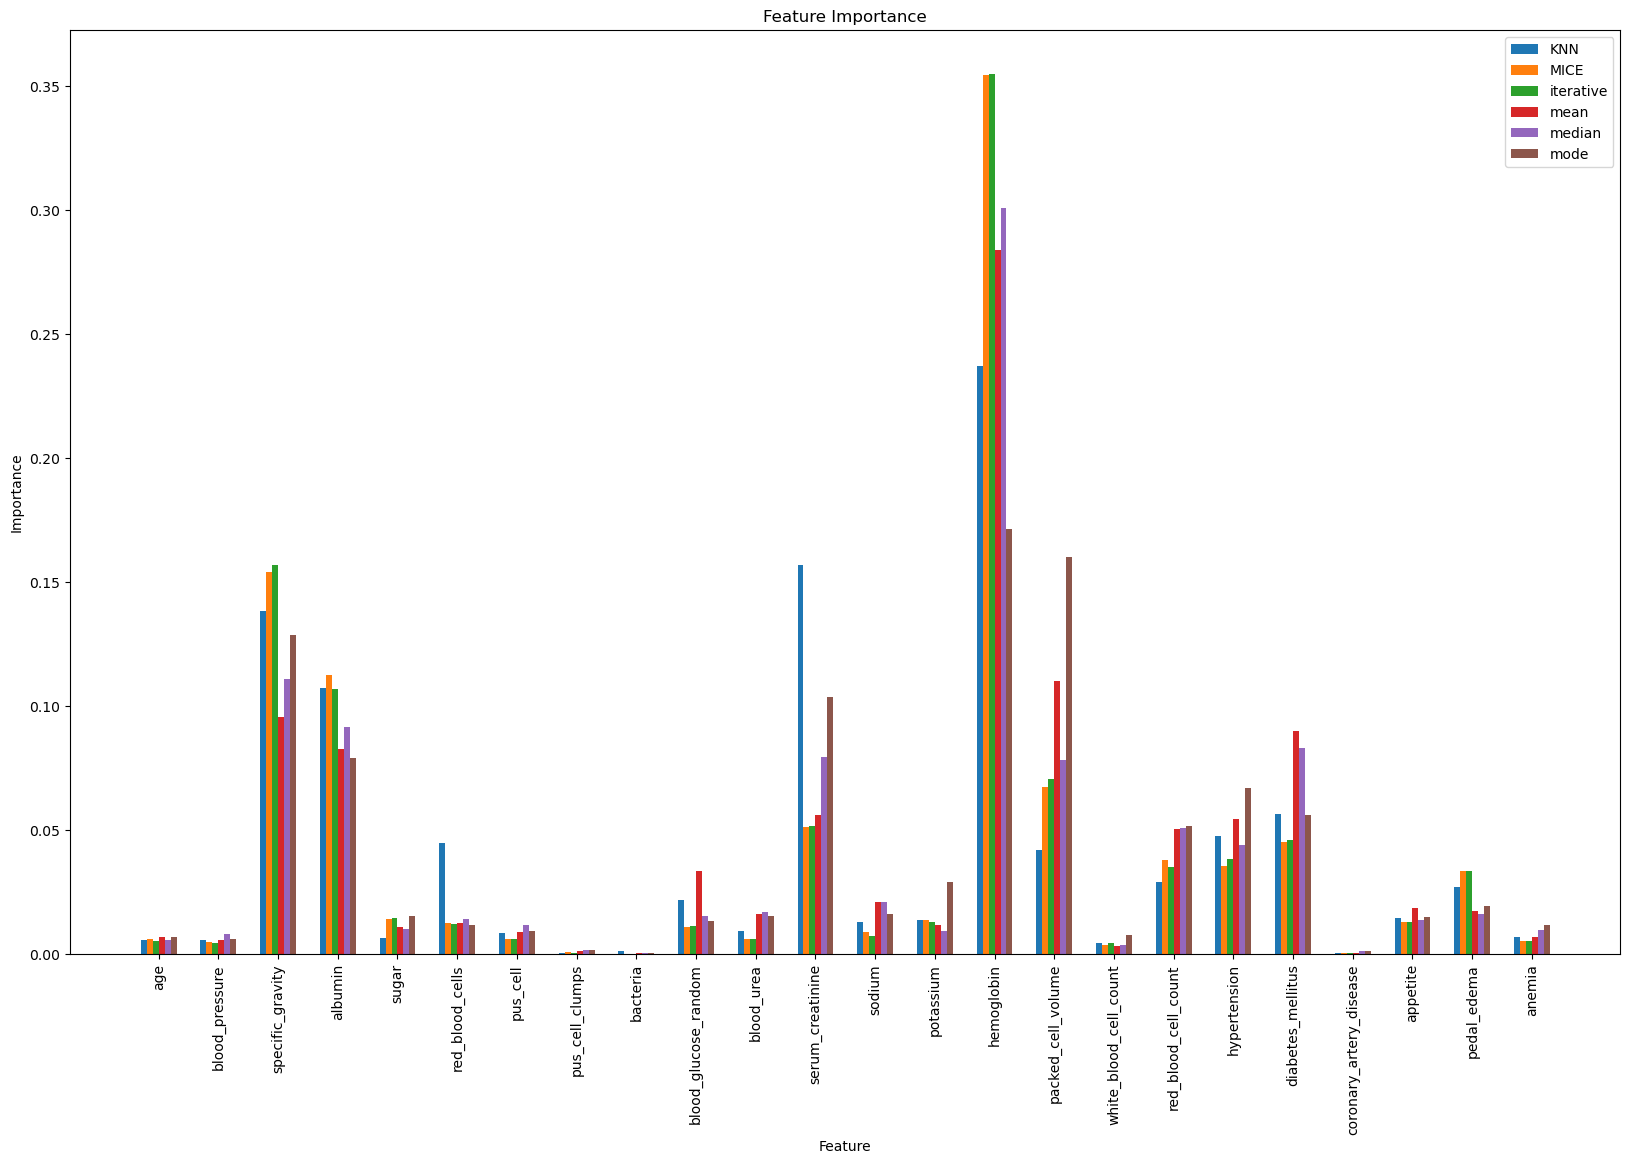

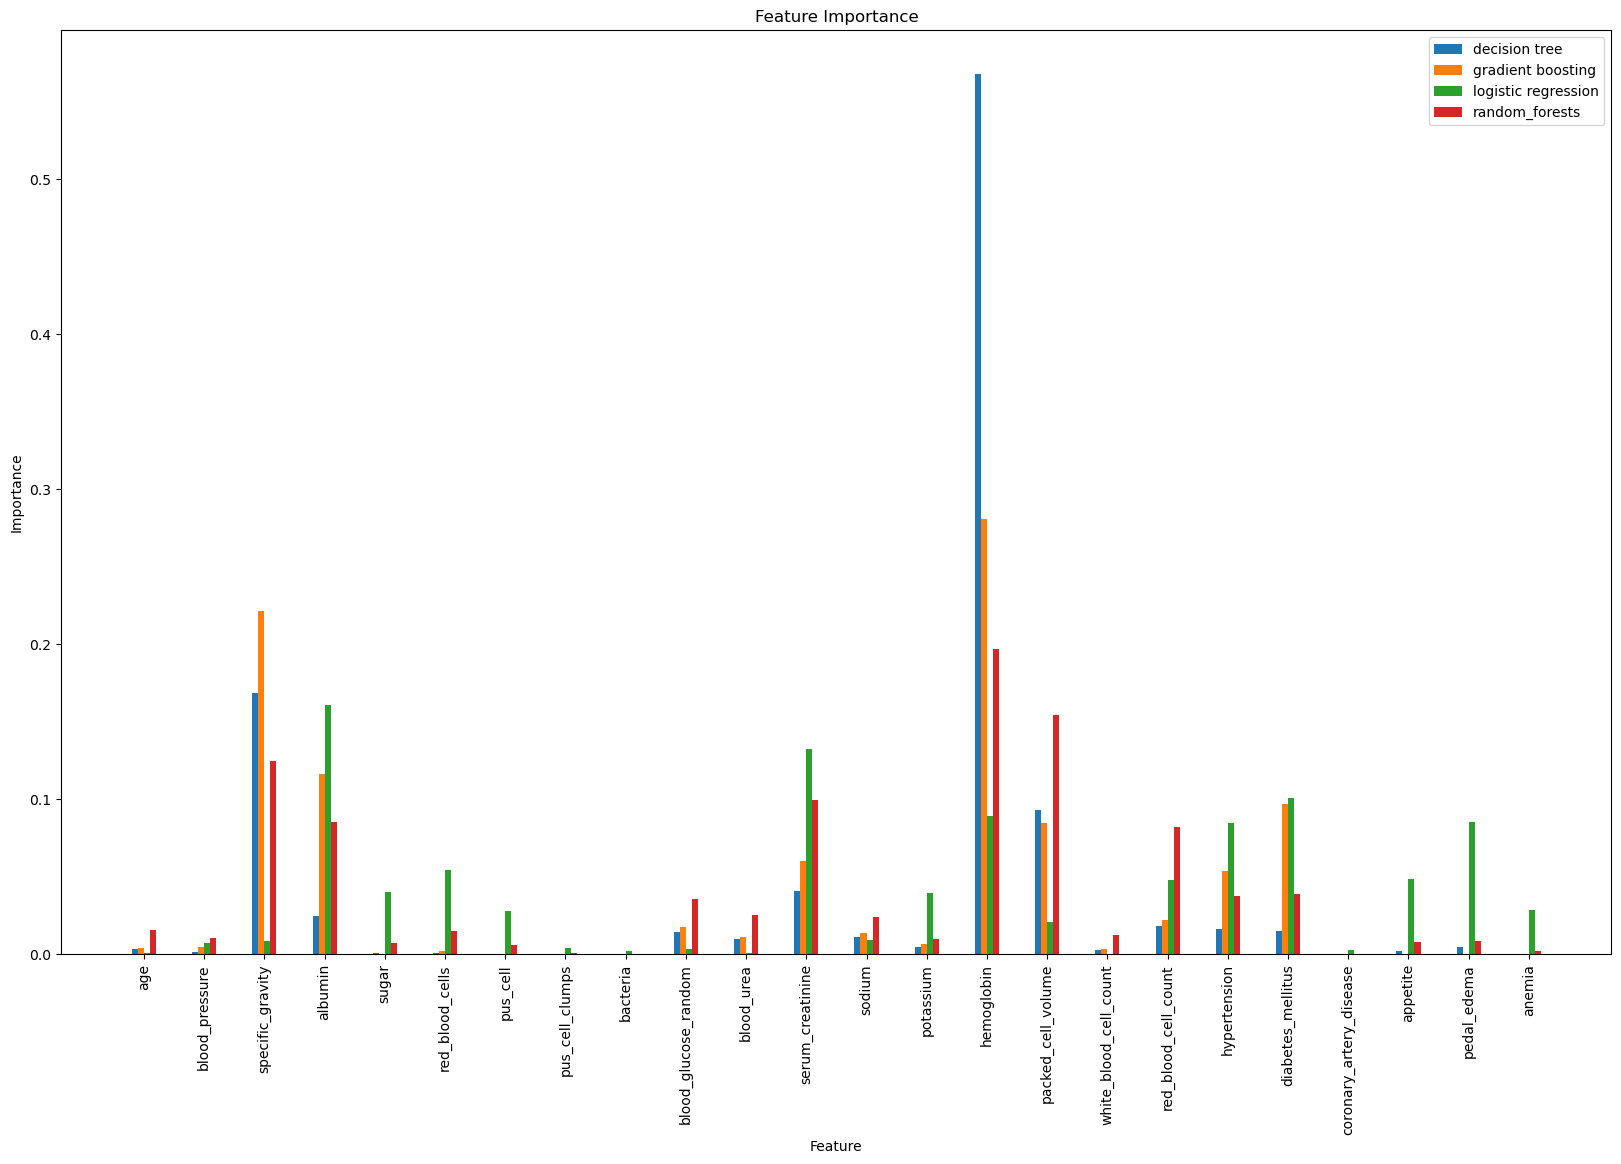

In [13]:
feature_importances_all = {
    'decision tree': pd.read_csv('results/feature_importances_decision_tree.csv', index_col=0),
    'gradient boosting': pd.read_csv('results/feature_importances_gradient_boosting.csv', index_col=0),
    'logistic regression': pd.read_csv('results/feature_importances_logistic_regression.csv', index_col=0),
    # 'neural network': pd.read_csv('results/feature_importances_neural_network.csv', index_col=0),
    'random_forests': pd.read_csv('results/feature_importances_random_forests.csv', index_col=0),
    # 'svm': pd.read_csv('results/feature_importances_svm.csv', index_col=0),
}
feature_importances_imputation = []

for i, (name, importance) in enumerate(feature_importances_all.items()):
    feature_importances_imputation.append(importance.groupby('imputation').mean())

feature_importances_imputation = pd.concat(feature_importances_imputation).groupby(level=0).mean().drop(columns=['iteration'])
feature_importances_imputation = {key: pd.DataFrame(value.values.transpose(), index=value.columns, columns=['Importance']) for key, value in feature_importances_imputation.groupby('imputation')}


feature_importances_model = {}
for i, (name, importance) in enumerate(feature_importances_all.items()):
    values = importance.mean().drop('iteration').drop(columns=['imputation'])
    feature_importances_model[name] = pd.DataFrame(values.values, index=values.index, columns=['Importance'])
    
from util.functions import plot_feature_importances
plot_feature_importances(feature_importances_imputation)  # type: ignore
plot_feature_importances(feature_importances_model)  # type: ignore